# Index Funds Portfolio

https://en.wikipedia.org/wiki/Index_fund

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tabulate import tabulate
from scipy.stats import norm

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbols = ['SPY', 'IVV', 'SWPPX','NASDX', 'QQQ', 'VTWO', 'VTI', 'DIA']
start = '2016-01-01'
end = '2023-02-16'


# Read data 
df = yf.download(symbols,start,end)['Adj Close']

# View Columns
df.head()

[*********************100%***********************]  8 of 8 completed


,DIA,IVV,NASDX,QQQ,SPY,SWPPX,VTI,VTWO
Date,,,,,,,,
2016-01-04 00:00:00-05:00,147.321075,178.359100,9.439202,103.681839,177.237396,27.130054,90.817886,40.242912
2016-01-05 00:00:00-05:00,147.407120,178.729965,9.406425,103.501915,177.537140,27.182426,91.021225,40.306892
2016-01-06 00:00:00-05:00,145.299973,176.390106,9.324491,102.507713,175.297714,26.841995,89.801315,39.721992
2016-01-07 00:00:00-05:00,141.876892,172.169540,9.037706,99.297821,171.092026,26.204773,87.600296,38.652744
2016-01-08 00:00:00-05:00,140.397552,170.262314,8.963964,98.483528,169.214020,25.916710,86.601418,37.953621


In [3]:
df.tail()

,DIA,IVV,NASDX,QQQ,SPY,SWPPX,VTI,VTWO
Date,,,,,,,,
2023-02-09 00:00:00-05:00,336.528503,409.070007,26.730000,301.679993,407.089996,62.549999,204.639999,76.709999
2023-02-10 00:00:00-05:00,338.175812,409.959991,26.570000,299.700012,408.040009,62.700001,205.009995,76.809998
2023-02-13 00:00:00-05:00,341.989532,414.779999,26.990000,304.500000,412.829987,63.419998,207.449997,77.720001
2023-02-14 00:00:00-05:00,340.581879,414.559998,27.190001,306.750000,412.640015,63.419998,207.529999,77.699997
2023-02-15 00:00:00-05:00,341.101013,415.880005,27.400000,309.100006,413.980011,63.610001,208.460007,78.510002


In [4]:
from datetime import datetime
from dateutil import relativedelta

d1 = datetime.strptime(start, "%Y-%m-%d")
d2 = datetime.strptime(end, "%Y-%m-%d")
delta = relativedelta.relativedelta(d2,d1)
print('How many years of investing?')
print('%s years' % delta.years)

How many years of investing?
7 years


In [5]:
from datetime import datetime

def calculate_years(start, end): 
    date_format = "%Y-%m-%d"
    a = datetime.strptime(start, date_format).year
    b = datetime.strptime(end, date_format).year
    years = b - a
  
    return years 

In [6]:
print(calculate_years(start, end), 'years')

7 years


In [7]:
delta = d1 - d2
years = relativedelta.relativedelta(d2,d1).years
years

7

In [8]:
r = relativedelta.relativedelta(d1, d2)
months = -(r.months + (12*r.years))
months

85

In [9]:
delta = d1 - d2
days = delta.days
-(days)

2603

In [10]:
print("Years of Investing: %s" % years)
print("Months of Investing: %s" % months)
print("Days of Investing: %s" % -days)

Years of Investing: 7
Months of Investing: 85
Days of Investing: 2603


In [11]:
diff = relativedelta.relativedelta(d2, d1)

years = diff.years
months = diff.months
days = diff.days

print('Long term Investing Dates:')
print('{} years {} months {} days'.format(years, months, days))

Long term Investing Dates:
7 years 1 months 15 days


In [12]:
Number_of_Stocks = len(symbols)
Number_of_Stocks

8

In [13]:
percent_invest = round((100/Number_of_Stocks)/100,2)
percent_invest

0.12

In [14]:
print('Percentage of invest:')
Cash = 100000
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    percentages = (round(cost,3)/Cash)*100
    print('{}: {}%'.format(i, percentages))

Percentage of invest:
DIA: 12.0%
IVV: 12.0%
NASDX: 12.0%
QQQ: 12.0%
SPY: 12.0%
SWPPX: 12.0%
VTI: 12.0%
VTWO: 12.0%


In [15]:
print('Number of Shares:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    print('{}: {}'.format(i, shares))

Number of Shares:
DIA: 81
IVV: 67
NASDX: 1271
QQQ: 115
SPY: 67
SWPPX: 442
VTI: 132
VTWO: 298


In [16]:
print('Beginning Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x in zip(df.columns, df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Begin_Value = round(shares * x, 2)
    print('{}: ${}'.format(i, Begin_Value))

Beginning Value:
DIA: $11933.01
IVV: $11950.06
NASDX: $11997.23
QQQ: $11923.41
SPY: $11874.91
SWPPX: $11991.48
VTI: $11987.96
VTWO: $11992.39


In [17]:
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Current Value:
DIA: $27629.18
IVV: $27863.96
NASDX: $34825.4
QQQ: $35546.5
SPY: $27736.66
SWPPX: $28115.62
VTI: $27516.72
VTWO: $23395.98


In [18]:
print('Short Selling')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Short Selling
Current Value:
DIA: $5156.24
IVV: $4994.05
NASDX: $4124.93
QQQ: $3939.91
SPY: $4962.65
SWPPX: $5100.45
VTI: $5176.62
VTWO: $6116.92


In [19]:
short_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[-1], df.iloc[0]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    short_result.append(Current_Value)
print('Total Value of Shorting: $%s' % round(sum(short_result),2))

Total Value of Shorting: $39571.77


In [20]:
print('Buy Long')
print('Current Value:')
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    print('{}: ${}'.format(i, Current_Value))

Buy Long
Current Value:
DIA: $27629.18
IVV: $27863.96
NASDX: $34825.4
QQQ: $35546.5
SPY: $27736.66
SWPPX: $28115.62
VTI: $27516.72
VTWO: $23395.98


In [21]:
long_result = []
Number_of_Stocks = len(symbols)
percent_invest = round((100/Number_of_Stocks)/100,2)
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    cost = Cash * percent_invest
    shares = int(cost/x)
    Current_Value = round(shares * y, 2)
    long_result.append(Current_Value)
print('Total Long Value: $%s' % round(sum(long_result),2))

Total Long Value: $232630.02


In [22]:
print('Which is more profit? Long or Short?')
print('Total Value of Long: $%s' % round(sum(long_result),2))
print('Total Value of Shorting: $%s' % round(sum(short_result),2))
if sum(short_result) >= sum(long_result):
   print("Short the portfolio!")
else:
   print("Long the portfolio!")

Which is more profit? Long or Short?
Total Value of Long: $232630.02
Total Value of Shorting: $39571.77
Long the portfolio!


In [23]:
print('Holding Period Return:') # Calculate without Dividends
for i, x, y in zip(df.columns, df.iloc[0], df.iloc[-1]):
    HPR = (y - x) / x
    print('Holding Period Return: {}: {:.2f}%'.format(i, round(HPR,4)*100))

Holding Period Return:
Holding Period Return: DIA: 131.54%
Holding Period Return: IVV: 133.17%
Holding Period Return: NASDX: 190.28%
Holding Period Return: QQQ: 198.12%
Holding Period Return: SPY: 133.57%
Holding Period Return: SWPPX: 134.46%
Holding Period Return: VTI: 129.54%
Holding Period Return: VTWO: 95.09%


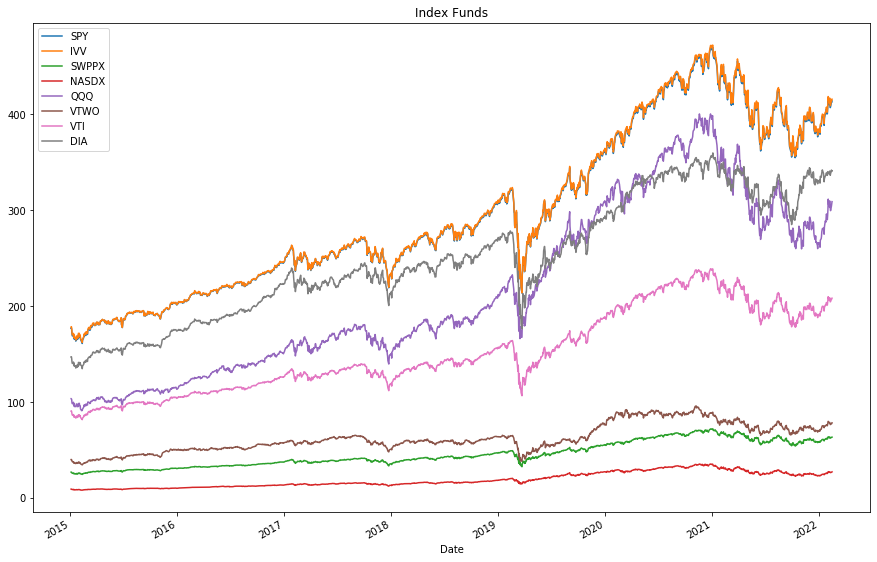

In [24]:
for s in symbols: 
    df[s].plot(label = s, figsize = (15,10))
plt.title('Index Funds')
plt.legend()

In [25]:
# Normalize the data
normalize = (df - df.min())/ (df.max() - df.min())

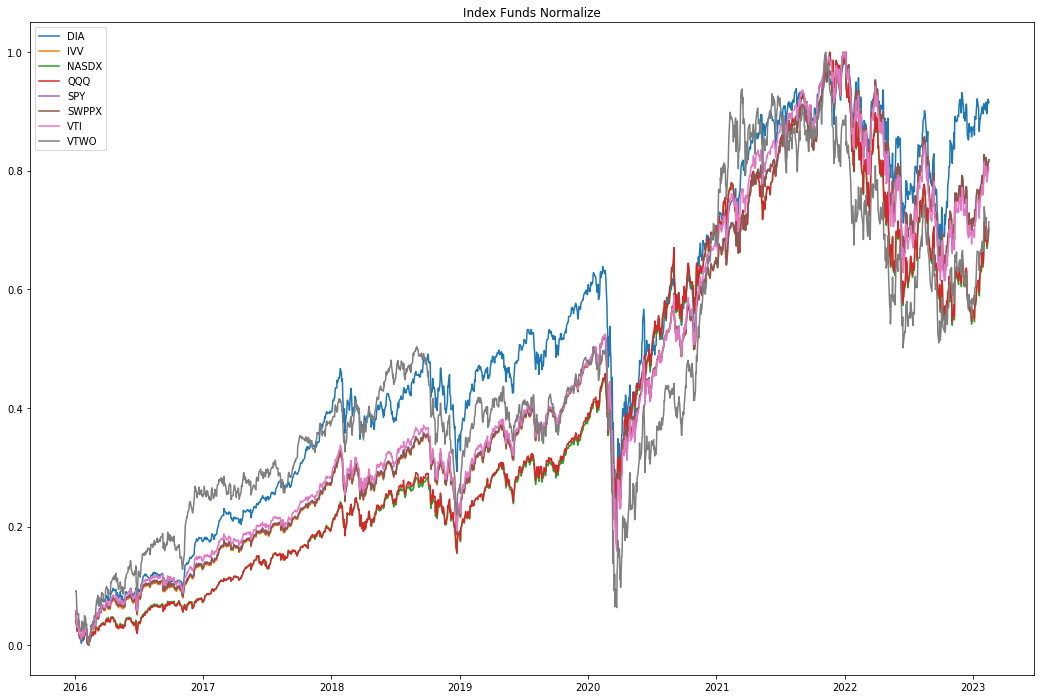

In [26]:
plt.figure(figsize=(18,12))
plt.plot(normalize)
plt.title('Index Funds Normalize')
plt.legend(labels=normalize.columns)

In [27]:
df.min()

DIA      134.929672
IVV      162.315598
NASDX      8.292078
QQQ       91.202133
SPY      161.225937
SWPPX     24.712093
VTI       81.819191
VTWO      34.672783
dtype: float64

In [28]:
for s in symbols:
    print(s + ":",  df[s].max())

SPY: 470.0837097167969
IVV: 472.27752685546875
SWPPX: 72.24073791503906
NASDX: 35.61029815673828
QQQ: 400.52825927734375
VTWO: 96.0687026977539
VTI: 239.07778930664062
DIA: 359.89471435546875


In [29]:
# Creating a Return Data Frame for all individual stocks: 
returns = pd.DataFrame()
for s in symbols: 
    returns[s + " Return"] = df[s].pct_change().dropna()
    
returns.head(4)

,SPY Return,IVV Return,SWPPX Return,NASDX Return,QQQ Return,VTWO Return,VTI Return,DIA Return
Date,,,,,,,,
2016-01-05 00:00:00-05:00,0.001691,0.002079,0.001930,-0.003473,-0.001735,0.001590,0.002239,0.000584
2016-01-06 00:00:00-05:00,-0.012614,-0.013092,-0.012524,-0.008710,-0.009606,-0.014511,-0.013402,-0.014295
2016-01-07 00:00:00-05:00,-0.023992,-0.023927,-0.023740,-0.030756,-0.031314,-0.026918,-0.024510,-0.023559
2016-01-08 00:00:00-05:00,-0.010977,-0.011078,-0.010993,-0.008159,-0.008201,-0.018087,-0.011403,-0.010427


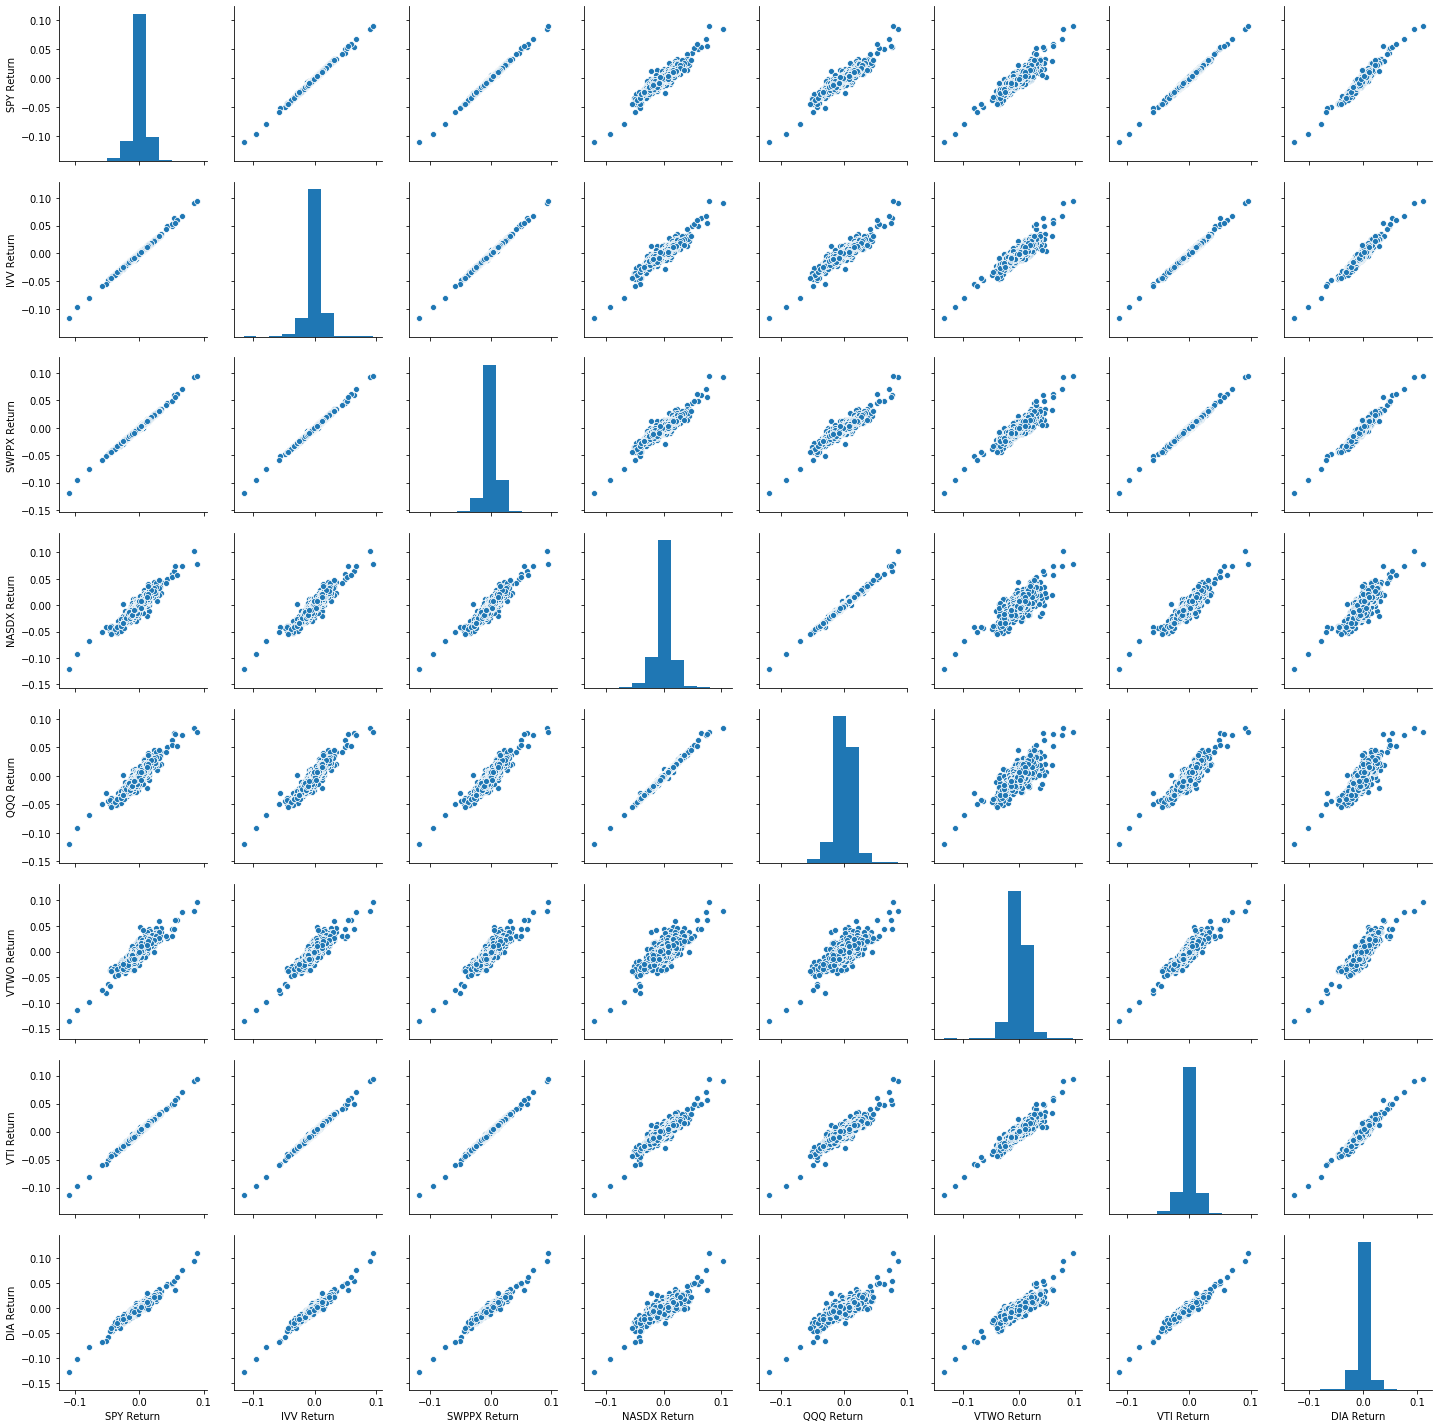

In [30]:
sns.pairplot(returns[1:])

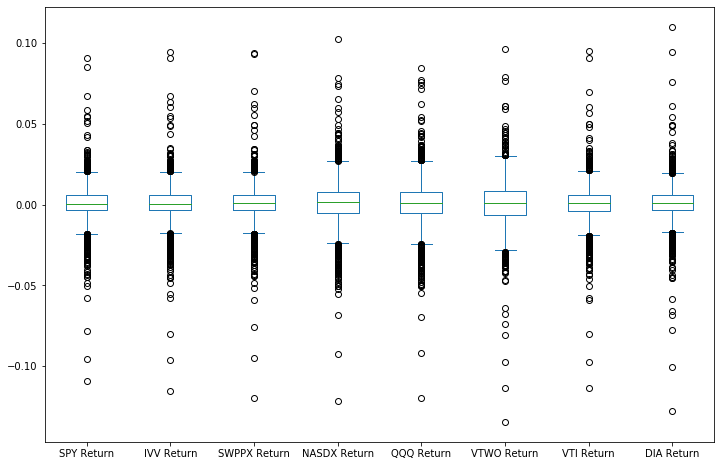

In [31]:
returns.plot(kind='box',figsize=(12,8))

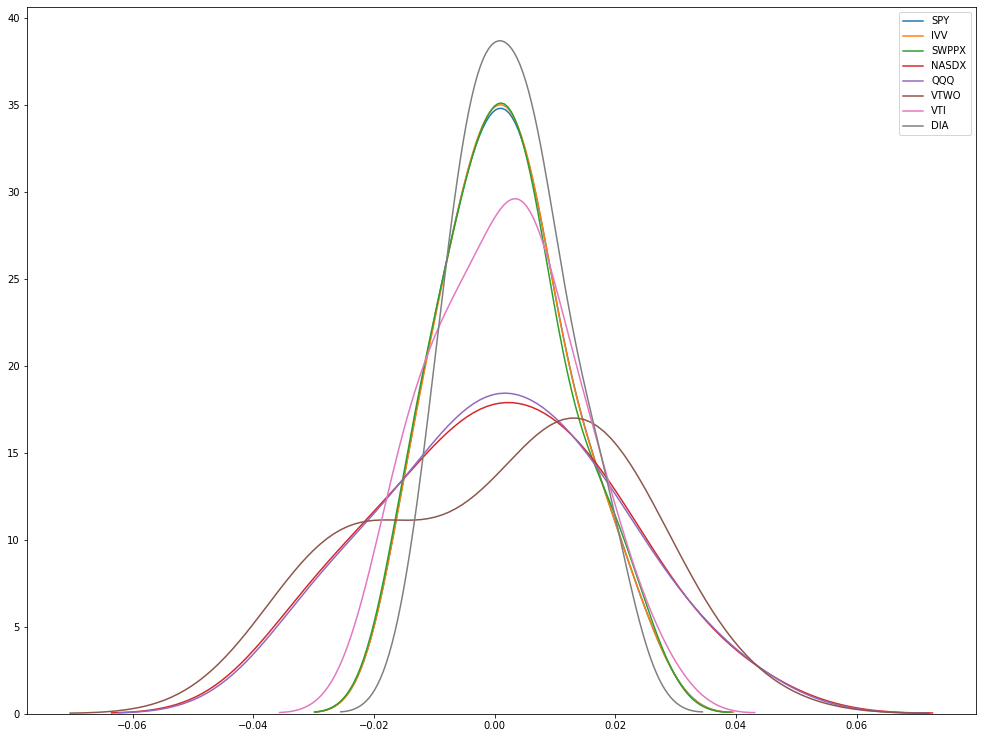

In [32]:
plt.figure(figsize=(17,13))

for r in returns:
    sns.kdeplot(returns.loc["2021-03-01" : "2021-03-31 "][r])
    plt.legend(labels=symbols)

In [33]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmax())

SPY Return     2020-03-24 00:00:00-04:00
IVV Return     2020-03-24 00:00:00-04:00
SWPPX Return   2020-03-24 00:00:00-04:00
NASDX Return   2020-03-13 00:00:00-04:00
QQQ Return     2020-03-13 00:00:00-04:00
VTWO Return    2020-03-24 00:00:00-04:00
VTI Return     2020-03-24 00:00:00-04:00
DIA Return     2020-03-24 00:00:00-04:00
dtype: datetime64[ns, America/New_York]


In [34]:
# dates each stock had the best and worst single day returns. 
print(returns.idxmin())

SPY Return     2020-03-16 00:00:00-04:00
IVV Return     2020-03-16 00:00:00-04:00
SWPPX Return   2020-03-16 00:00:00-04:00
NASDX Return   2020-03-16 00:00:00-04:00
QQQ Return     2020-03-16 00:00:00-04:00
VTWO Return    2020-03-16 00:00:00-04:00
VTI Return     2020-03-16 00:00:00-04:00
DIA Return     2020-03-16 00:00:00-04:00
dtype: datetime64[ns, America/New_York]


In [35]:
returns.corr()

,SPY Return,IVV Return,SWPPX Return,NASDX Return,QQQ Return,VTWO Return,VTI Return,DIA Return
SPY Return,1.000000,0.999123,0.998697,0.932111,0.929084,0.886252,0.996160,0.961456
IVV Return,0.999123,1.000000,0.998935,0.930819,0.927698,0.885320,0.995781,0.963019
SWPPX Return,0.998697,0.998935,1.000000,0.932332,0.928273,0.886086,0.995864,0.962372
NASDX Return,0.932111,0.930819,0.932332,1.000000,0.997301,0.793214,0.929521,0.830929
QQQ Return,0.929084,0.927698,0.928273,0.997301,1.000000,0.787451,0.925296,0.826478
VTWO Return,0.886252,0.885320,0.886086,0.793214,0.787451,1.000000,0.914577,0.862674
VTI Return,0.996160,0.995781,0.995864,0.929521,0.925296,0.914577,1.000000,0.955614
DIA Return,0.961456,0.963019,0.962372,0.830929,0.826478,0.862674,0.955614,1.000000


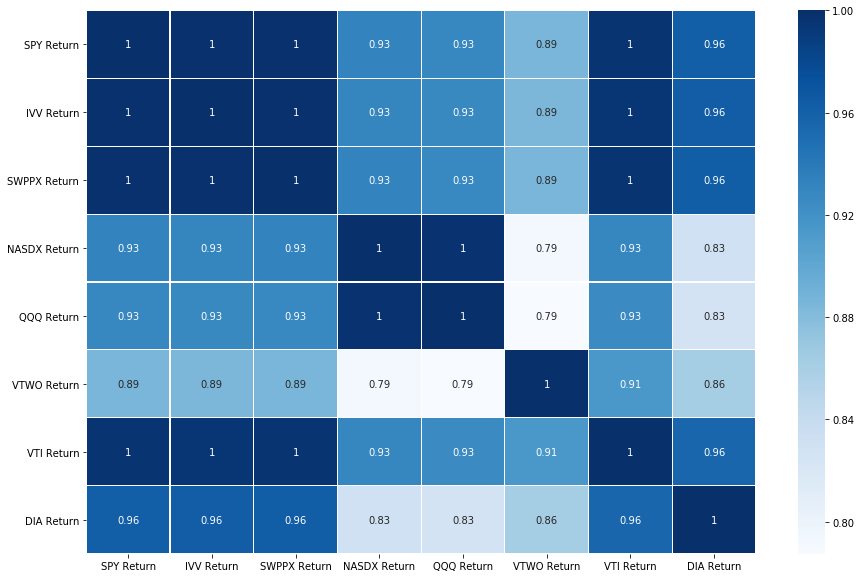

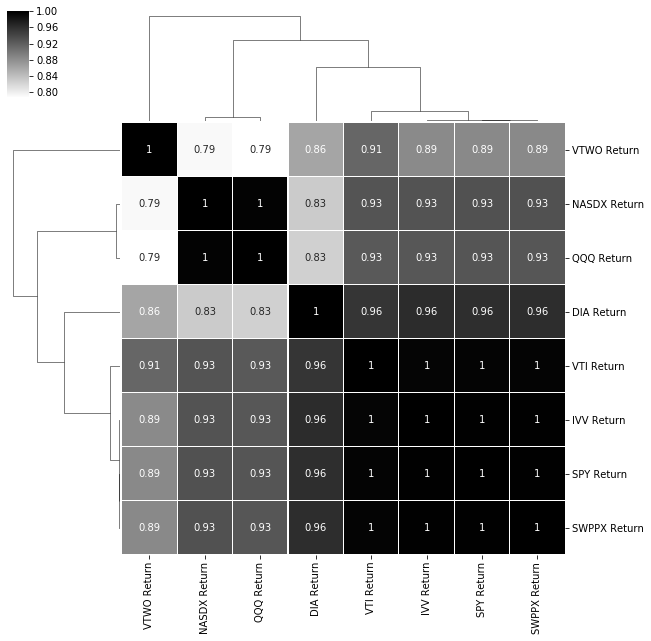

In [36]:
# Heatmap for return of all the stocks
plt.figure(figsize=(15,10))
sns.heatmap(returns.corr(), cmap="Blues",linewidths=.1, annot= True)


sns.clustermap(returns.corr(), cmap="binary",linewidths=.1, annot= True)

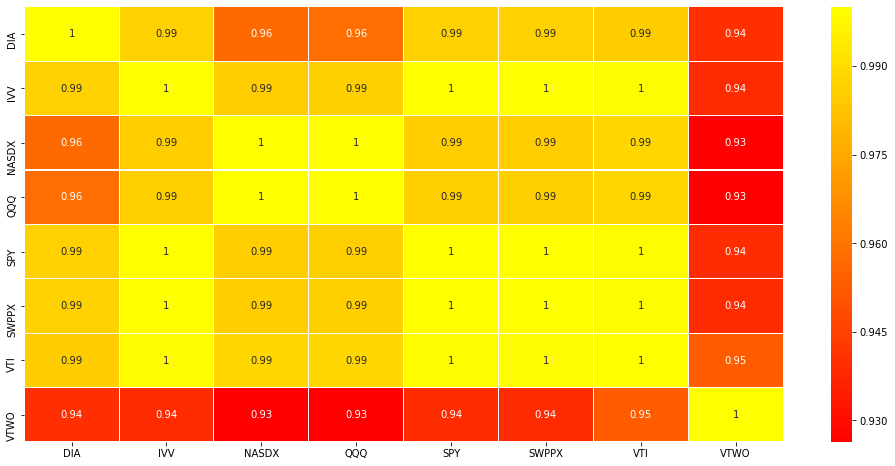

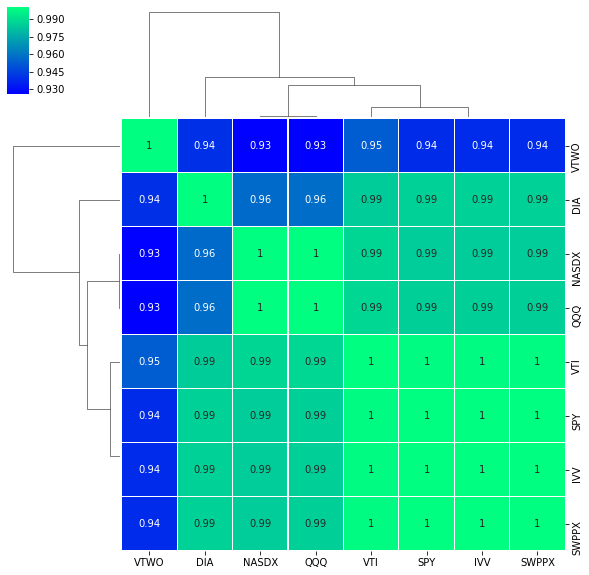

In [37]:
# heatmap for Adj. Close prices for all the stock
plt.figure(figsize = (17,8))
sns.heatmap(df.corr(), cmap="autumn",linewidths=.1, annot= True)


sns.clustermap(df.corr(), cmap="winter",linewidths=.1, annot= True)

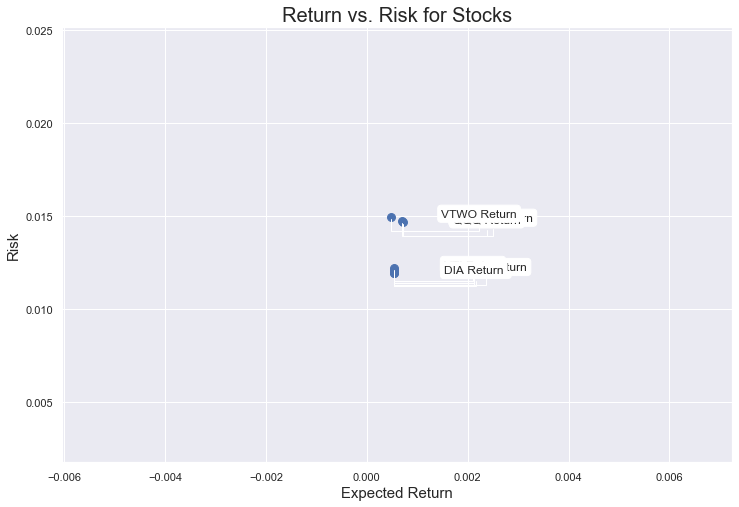

In [38]:
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(returns.columns, returns.mean(), returns.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

In [39]:
returns = df.pct_change().dropna()
mean = np.mean(returns)
std_dev = np.std(returns)

In [40]:
VaR_90 = norm.ppf(1-0.9, mean, std_dev)
VaR_95 = norm.ppf(1-0.95, mean, std_dev)
VaR_99 = norm.ppf(1-0.99, mean, std_dev)

In [41]:
print(tabulate([['90%', VaR_90], ['95%', VaR_95], ['99%', VaR_99]], headers=['Confidence Level', 'Value at Risk']))

Confidence Level    Value at Risk
------------------  ------------------------------------------------------------------------
90%                 [-0.01478803 -0.01498349 -0.01821601 -0.01808785 -0.01477791 -0.01497952
                     -0.01513164 -0.01870803]
95%                 [-0.01913348 -0.01938598 -0.02357965 -0.02341901 -0.01912185 -0.01938176
                     -0.01957403 -0.02414929]
99%                 [-0.02728483 -0.02764433 -0.03364094 -0.03341937 -0.02727035 -0.02763963
                     -0.02790721 -0.03435619]


In [42]:
print('Value-at-Risk Confidence Level 90%:')
for i, x in zip(df.columns, VaR_90):
    print('{}: {}'.format(i, round(x,4)))

Value-at-Risk Confidence Level 90%:
DIA: -0.0148
IVV: -0.015
NASDX: -0.0182
QQQ: -0.0181
SPY: -0.0148
SWPPX: -0.015
VTI: -0.0151
VTWO: -0.0187


In [43]:
print('Value-at-Risk Confidence Level 90%:')

for i, x  in zip(df.columns, VaR_90):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 90%:
DIA: $1000.00
IVV: $1000.00
NASDX: $2000.00
QQQ: $2000.00
SPY: $1000.00
SWPPX: $1000.00
VTI: $2000.00
VTWO: $2000.00


In [44]:
print('Value-at-Risk Confidence Level 99%:')

for i, x  in zip(df.columns, VaR_99):
    print('{}: ${:.2f}'.format(i, -round(x,2)*100000))

Value-at-Risk Confidence Level 99%:
DIA: $3000.00
IVV: $3000.00
NASDX: $3000.00
QQQ: $3000.00
SPY: $3000.00
SWPPX: $3000.00
VTI: $3000.00
VTWO: $3000.00
